In [1]:
import pandas as pd
df = pd.read_csv('../../Datos/df_balanceado.csv').drop(['time'],axis=1)
df_features = df[['count','winddirection_10m_dominant (°)','semana_del_mes','semana_del_anio','es_festivo_mexico','anio','dia_de_la_semana']]
df_features.head()

,count,winddirection_10m_dominant (°),semana_del_mes,semana_del_anio,es_festivo_mexico,anio,dia_de_la_semana
0,129,59,15,15,0,2018,1
1,46,101,37,37,0,2017,6
2,80,340,24,24,0,2022,3
3,95,124,44,44,0,2018,5
4,41,3,37,37,0,2022,6


In [2]:
# Preparar la matriz de características (X) y el vector objetivo (Y)
# En X, eliminamos las columnas 'time' y 'count' que no son características
X = df_features.drop(['count'], axis=1)

# En Y, seleccionamos la columna 'count' como nuestro vector objetivo
Y = df_features['count']


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
import time
import pandas as pd

# Divide tus datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Inicializa diferentes modelos de regresión
models = {
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'K-NN': KNeighborsRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network (ANN)': MLPRegressor()
}

# Entrena y evalúa cada modelo
results = {}
for model_name, model in models.items():
    start_time = time.time()
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    msle = mean_squared_log_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        'MAE': mae,
        'MAPE': mape,
        'MSE': mse,
        'RMSE': rmse,
        'MSLE': msle,
        'R-squared': r2,
        'Elapsed Time (s)': elapsed_time
    }

# Crea una tabla de resultados
results_df = pd.DataFrame.from_dict(results, orient='index')


# Muestra la tabla de resultados
results_df.sort_values(by='R-squared', ascending=False)


c:\Users\fer_m\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,MAE,MAPE,MSE,RMSE,MSLE,R-squared,Elapsed Time (s)
Gradient Boosting,10.517284,18.243176,205.980373,14.352016,0.055601,0.670768,0.117033
Random Forest,10.456169,18.022997,212.516808,14.577956,0.055502,0.660320,0.595490
AdaBoost,13.043224,22.946952,281.851211,16.788425,0.074867,0.549499,0.029194
Linear Regression,16.924024,30.702199,456.565638,21.367397,0.123359,0.270241,0.014277
Neural Network (ANN),19.421515,35.595729,559.480798,23.653346,0.142207,0.105745,0.523940
SVR,20.806535,37.916757,625.605661,25.012110,0.155516,0.000053,0.057230
K-NN,20.495019,37.271914,659.870958,25.687954,0.161383,-0.054715,0.007002


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import numpy as np
import time
import pandas as pd
# Ignorar advertencias
import warnings
warnings.filterwarnings('ignore') 


# Inicializa diferentes modelos de regresión
models = {
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'K-NN': KNeighborsRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Neural Network (ANN)': MLPRegressor()
}

# Define diferentes tamaños de conjunto de prueba para probar
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

# Número de iteraciones por tamaño de prueba
num_iterations = 100
# Almacena los resultados de todas las iteraciones en un solo DataFrame
all_results = []

for test_size in test_sizes:

    # Divide los datos en entrenamiento y prueba con el nuevo tamaño de prueba fuera del bucle de modelos
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

    for iteration in range(num_iterations):
        results = {}
        for model_name, model in models.items():
            start_time = time.time()

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            end_time = time.time()
            elapsed_time = end_time - start_time

            mae = mean_absolute_error(y_test, y_pred)
            mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
            mse = mean_squared_error(y_test, y_pred)
            rmse = mean_squared_error(y_test, y_pred, squared=False)
            msle = mean_squared_log_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            results[model_name] = {
                'MAE': mae,
                'MAPE': mape,
                'MSE': mse,
                'RMSE': rmse,
                'MSLE': msle,
                'R-squared': r2,
                'Elapsed Time (s)': elapsed_time
            }

        all_results.append(results)

    

# Crear un DataFrame único con los resultados acumulados
results_df = pd.concat([pd.DataFrame.from_dict(iteration_results, orient='index') for iteration_results in all_results], keys=test_sizes, names=['Test Size','Modelo'])
#results_df.columns = ['Test Size', 'Modelo', 'MAE','MAPE','RMSE','R-squared','Elapsed Time (s)']

# Mostrar el DataFrame completo
results_df.sort_values(by=('R-squared'), ascending=False).head(20)


,,MAE,MAPE,MSE,RMSE,MSLE,R-squared,Elapsed Time (s)
Test Size,Modelo,,,,,,,
0.3,Gradient Boosting,9.557449,14.446656,161.090444,12.692141,0.031959,0.674128,0.100049
0.4,Gradient Boosting,9.563877,14.452836,161.155768,12.694714,0.031965,0.673996,0.101959
0.1,Gradient Boosting,9.563877,14.452836,161.155768,12.694714,0.031965,0.673996,0.109768
0.5,Gradient Boosting,9.572140,14.462018,161.217634,12.697151,0.031972,0.673871,0.102853
0.2,Gradient Boosting,9.570244,14.458959,161.231151,12.697683,0.031973,0.673844,0.103401
0.5,Random Forest,10.324809,15.597778,178.244321,13.350817,0.035998,0.639427,0.617009
0.4,Random Forest,10.429466,15.663091,178.795566,13.371446,0.035434,0.638312,0.602841
0.1,Random Forest,10.451221,15.840693,182.180796,13.497437,0.036803,0.631464,0.606451
0.3,Random Forest,10.396794,15.709810,182.867985,13.522869,0.036750,0.630074,0.617471


In [4]:
results_df.reset_index(inplace=True)

In [5]:
import pandas as pd

# Set the display option to truncate floats to 2 decimal places
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

# Sort the DataFrame by 'R-squared' column in descending order and display the top 10 rows
truncated_results = results_df[['MAPE','Test Size','Modelo','R-squared','MAE','MSE','RMSE','MSLE','Elapsed Time (s)']].sort_values(by='R-squared', ascending=False).head(10)
truncated_results


,MAPE,Test Size,Modelo,R-squared,MAE,MSE,RMSE,MSLE,Elapsed Time (s)
19,14.45,0.30,Gradient Boosting,0.67,9.56,161.09,12.69,0.03,0.10
26,14.45,0.40,Gradient Boosting,0.67,9.56,161.16,12.69,0.03,0.10
5,14.45,0.10,Gradient Boosting,0.67,9.56,161.16,12.69,0.03,0.11
33,14.46,0.50,Gradient Boosting,0.67,9.57,161.22,12.70,0.03,0.10
12,14.46,0.20,Gradient Boosting,0.67,9.57,161.23,12.70,0.03,0.10
28,15.60,0.50,Random Forest,0.64,10.32,178.24,13.35,0.04,0.62
21,15.66,0.40,Random Forest,0.64,10.43,178.80,13.37,0.04,0.60
0,15.84,0.10,Random Forest,0.63,10.45,182.18,13.50,0.04,0.61
14,15.71,0.30,Random Forest,0.63,10.40,182.87,13.52,0.04,0.62
7,16.02,0.20,Random Forest,0.63,10.62,184.71,13.59,0.04,0.64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


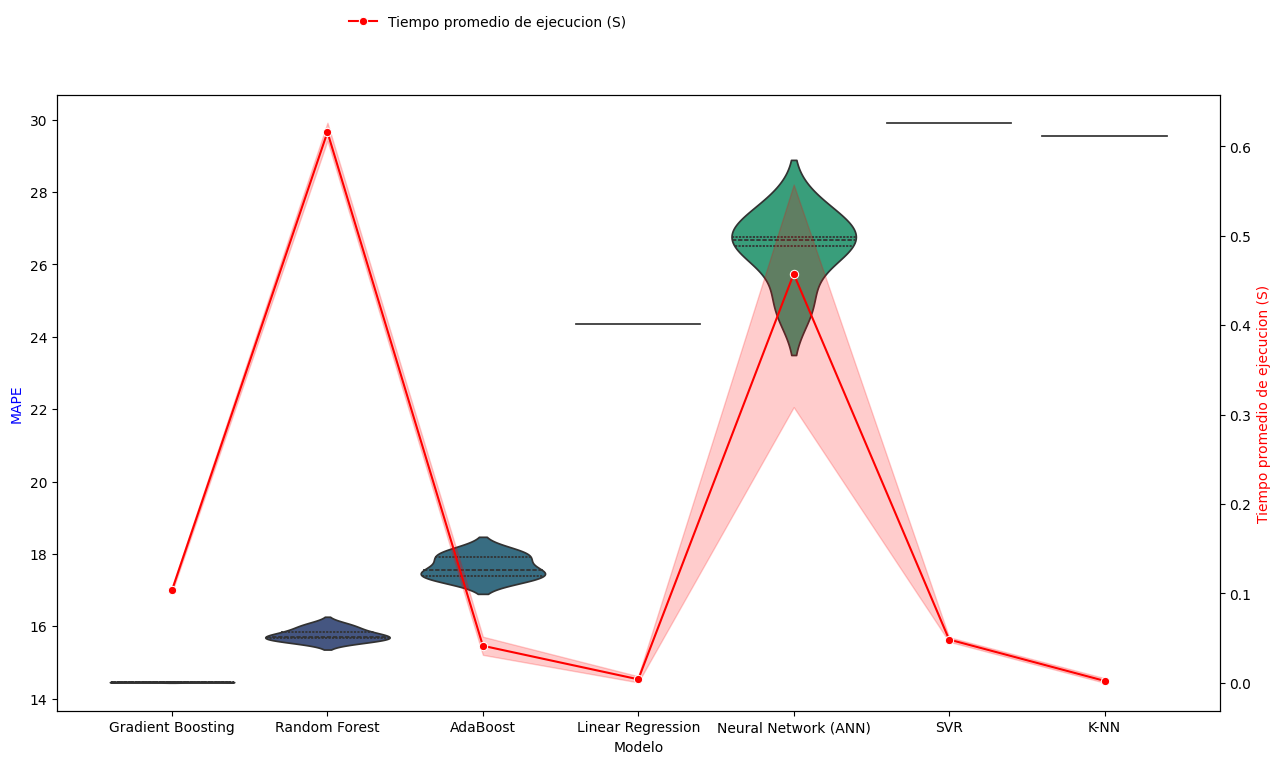

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra los 20 mejores resultados según el valor de R-squared
top_results = results_df.sort_values(by='R-squared', ascending=False)#.head(20)

# Reorganiza el DataFrame para facilitar la visualización
df_plot = top_results.reset_index()

# Crea el violin plot
fig, ax1 = plt.subplots(figsize=(15, 8))
sns.violinplot(x='Modelo', y='MAPE', data=df_plot, inner='quartile', ax=ax1, palette='viridis')

# Ajusta el límite del eje y para MAPE
#ax1.set_ylim(20, 30)

# Añade un segundo eje y para el tiempo de ejecución
ax2 = ax1.twinx()
sns.lineplot(x='Modelo', y='Elapsed Time (s)', data=df_plot, ax=ax2, color='red', marker='o', label='Tiempo promedio de ejecucion (S)')

# Ajusta las leyendas y etiquetas
ax1.set_ylabel('MAPE', color='blue')
ax2.set_ylabel('Tiempo promedio de ejecucion (S)', color='red')

# Posiciona la leyenda en la parte superior
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, 1.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, 1.15), frameon=False)

plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


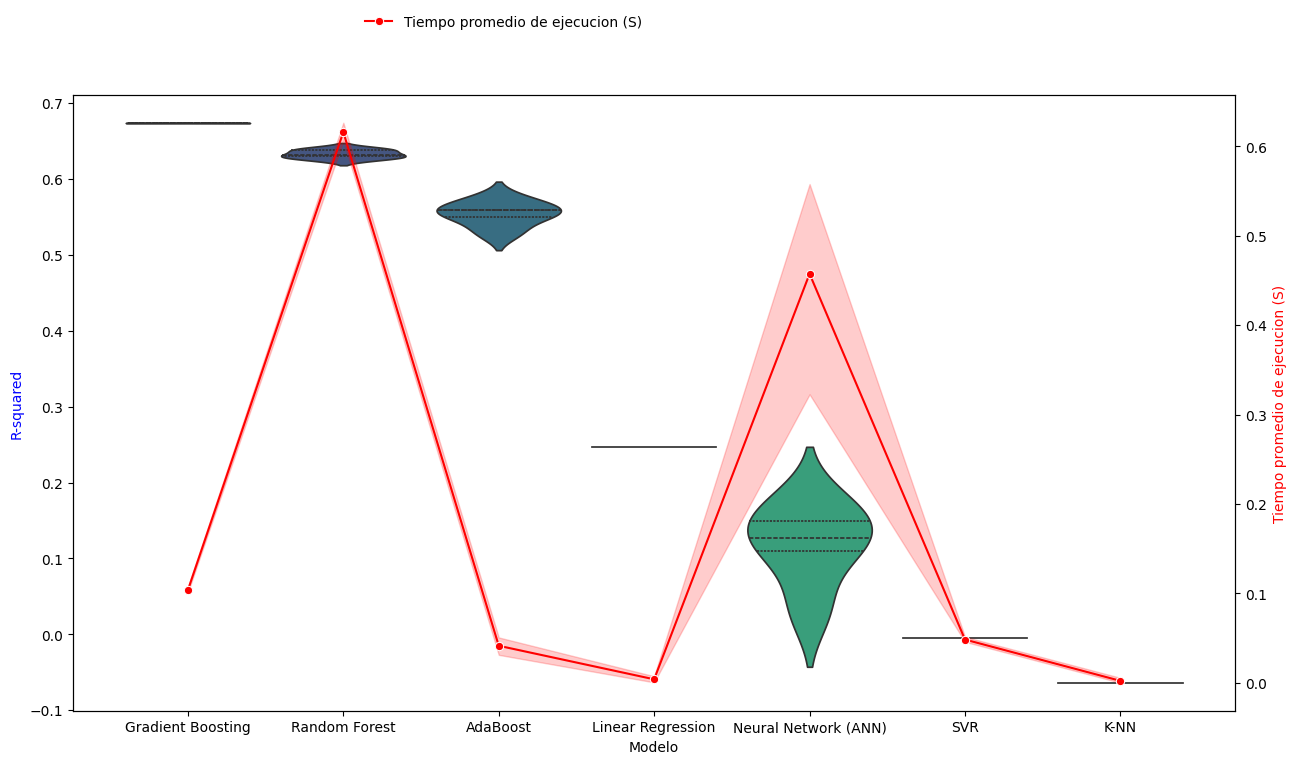

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtra los 20 mejores resultados según el valor de R-squared
top_results = results_df.sort_values(by='R-squared', ascending=False)#.head(20)

# Reorganiza el DataFrame para facilitar la visualización
df_plot = top_results.reset_index()

# Crea el violin plot
fig, ax1 = plt.subplots(figsize=(15, 8))
sns.violinplot(x='Modelo', y='R-squared', data=df_plot, inner='quartile', ax=ax1, palette='viridis')

# Ajusta el límite del eje y para MAPE
#ax1.set_ylim(20, 30)

# Añade un segundo eje y para el tiempo de ejecución
ax2 = ax1.twinx()
sns.lineplot(x='Modelo', y='Elapsed Time (s)', data=df_plot, ax=ax2, color='red', marker='o', label='Tiempo promedio de ejecucion (S)')

# Ajusta las leyendas y etiquetas
ax1.set_ylabel('MAPE', color='blue')
ax2.set_ylabel('Tiempo promedio de ejecucion (S)', color='red')

# Posiciona la leyenda en la parte superior
ax1.legend(loc='upper left', bbox_to_anchor=(0.5, 1.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(0.5, 1.15), frameon=False)

plt.show()


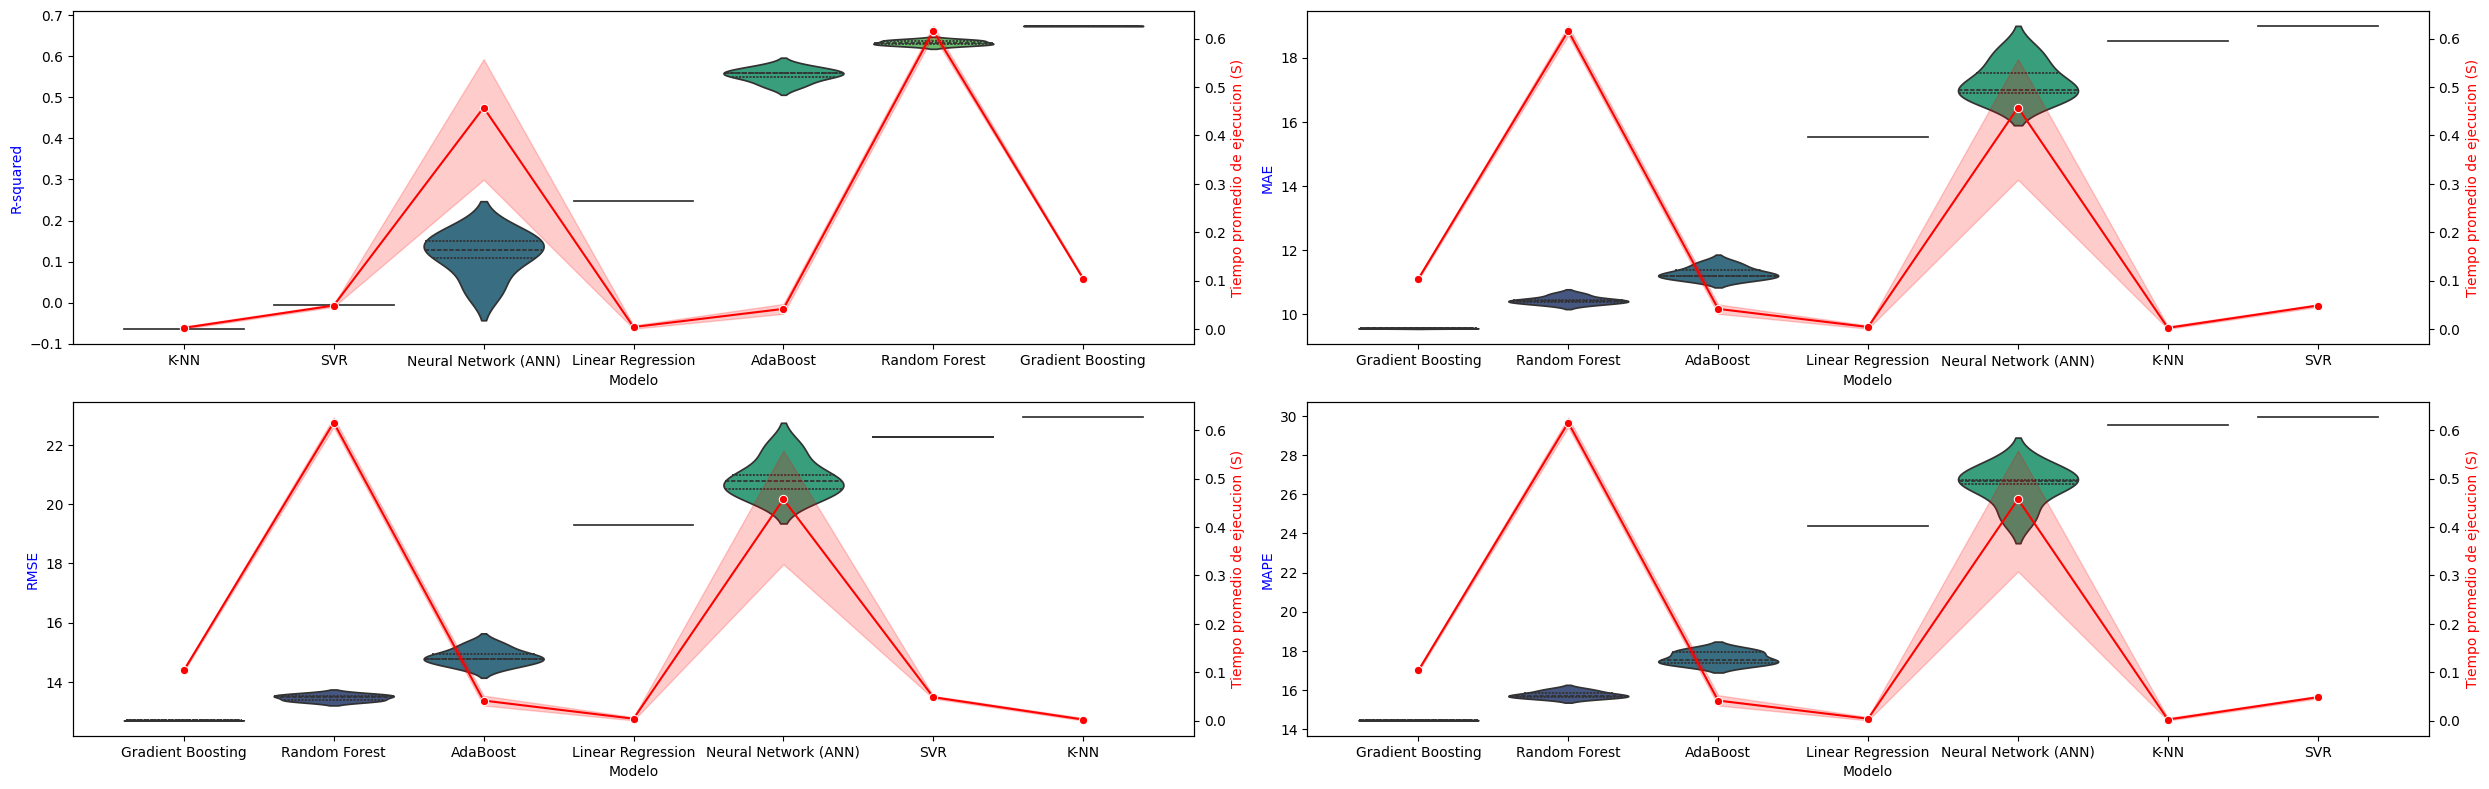

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crea subtramas para R-squared, MAE, RMSE y MAPE
fig, axes = plt.subplots(2, 2, figsize=(25, 8))

metrics = ['R-squared', 'MAE', 'RMSE', 'MAPE']
# Grafica los datos en cada subtrama y agrega la misma línea a cada gráfico
for i, m in enumerate(metrics):
    # Filtra los 20 mejores resultados según el valor de R-squared
    top_results = results_df.sort_values(by=m, ascending=True)#.head(20)

    # Reorganiza el DataFrame para facilitar la visualización
    df_plot = top_results.reset_index()

    # Calcula los índices de fila y columna para la subtrama
    row = i // 2
    col = i % 2
    
    # Gráfica de violín para MAPE, MAE, R-squared
    ax = axes[row, col]  # Obtiene el eje actual
    sns.violinplot(x='Modelo', y=m, data=df_plot, inner='quartile', ax=ax, palette='viridis')
    ax.set_ylabel(m, color='blue')
    
    # Agrega una línea a cada subtrama
    ax2 = ax.twinx()
    ax2.set_ylabel('Tiempo promedio de ejecucion (S)', color='red')
    sns.lineplot(x='Modelo', y='Elapsed Time (s)', data=df_plot, ax=ax2, color='red', marker='o') #, label='Tiempo promedio de ejecucion (S)'
    
    

# Ajusta el diseño y muestra los gráficos
plt.tight_layout()
plt.show()


Tras exhaustivas pruebas que involucraron la evaluación de diversos modelos con variaciones en los conjuntos de prueba y entrenamiento, cada uno ejecutado en 100 iteraciones para garantizar la robustez de los resultados, se observó una clara tendencia. Al analizar el Mean Absolute Percentage Error (MAPE) y el tiempo promedio de ejecución, se destacó el rendimiento superior del modelo de Gradient Boosting. Este resultado sugiere su idoneidad para abordar nuestro problema, mostrando consistencia y precisión en la predicción con tiempos de procesamiento eficientes.